<a href="https://colab.research.google.com/github/Shams3DDD/google_colab/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%98%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%BD%D0%B0_%D0%94%D0%95%D0%9C%D0%9E_%D0%9F%D0%90%D0%9D%D0%95%D0%9B%D0%AC_%7C_%D0%94%D0%97_Pro_%7C_%D0%A3%D0%98%D0%98%22_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо создать, обучить нейронную сеть с точностью не менее 85% и упаковать её в архив для загрузки на демо-панель:
* создать нейронную сеть для распознавания марки автомобиля из 3х вариантов
* сохраните веса
* подготовить запуск модели "из коробки"
* подготовить архив с готовой нейронной сетью для загрузки в демо-панель


# Загрузка данных

In [ ]:
# Работа с массивами
import numpy as np

# Генератор аугментированных изображений
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Основа для создания последовательной модели
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# Оптимизатор
from tensorflow.keras.optimizers import Adam

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import load_model

from PIL import Image, ImageOps

# Подключение модуля для загрузки данных из облака
import gdown

# Инструменты для работы с файлами
import os

# Отрисовка графиков
import matplotlib.pyplot as plt

# Рисование графиков в ячейках Colab
%matplotlib inline

In [ ]:
# Задание гиперпараметров

TRAIN_PATH = "/content/cars"  # Папка для обучающего набора данных
TEST_PATH = "/content/cars_test"  # Папка для тестового набора данных

TEST_SPLIT = 0.1  # Доля тестовых данных в общем наборе
VAL_SPLIT = 0.2  # Доля проверочной выборки в обучающем наборе

IMG_WIDTH = 128  # Ширина изображения для нейросети
IMG_HEIGHT = 64  # Высота изображения для нейросети
IMG_CHANNELS = 3  # Количество каналов (для RGB равно 3, для Grey равно 1)

# Параметры аугментации
ROTATION_RANGE = 8  # Пределы поворота
WIDTH_SHIFT_RANGE = 0.15  # Пределы сдвига по горизонтали
HEIGHT_SHIFT_RANGE = 0.15  # Пределы сдвига по вертикали
ZOOM_RANGE = 0.15  # Пределы увеличения/уменьшения
BRIGHTNESS_RANGE = (0.7, 1.3)  # Пределы изменения яркости
HORIZONTAL_FLIP = True  # Горизонтальное отражение разрешено

EPOCHS = 60  # Число эпох обучения
BATCH_SIZE = 24  # Размер батча для обучения модели
OPTIMIZER = Adam(0.0001)  # Оптимизатор

In [ ]:
# Загрузка zip-архива с датасетом из облака на диск виртуальной машины colab
gdown.download(
    "https://storage.yandexcloud.net/aiueducation/Content/base/l5/middle_fmr.zip",
    None,
    quiet=True,
)

'middle_fmr.zip'

In [ ]:
#  Для colab
# Очистка данных от прошлого запуска (если есть)
!rm -rf {TRAIN_PATH} {TEST_PATH}

# Разархивация датасета в директорию данных
!unzip -qo "middle_fmr.zip" -d {TRAIN_PATH}

In [ ]:
# Для vs code
#TRAIN_PATH = "/Users/admin/Project/AIuniversity/google_colab/content/cars"  # Папка для обучающего набора данных
#TEST_PATH = "/Users/admin/Project/AIuniversity/google_colab/content/cars_test"  # Папка для тестового набора данных

In [ ]:
# Для vscode
'''
import os
from pathlib import Path

# Указать путь к архиву и целевой директории
zip_file_path = "middle_fmr.zip"
target_directory = "/Users/admin/Project/AIuniversity/google_colab/content/cars"

# Создать директорию, если она не существует
Path(target_directory).mkdir(parents=True, exist_ok=True)

# Разархивировать с созданием директории
os.system(f"unzip -qo {zip_file_path} -d {target_directory}")
'''

'\nimport os\nfrom pathlib import Path\n\n# Указать путь к архиву и целевой директории\nzip_file_path = "middle_fmr.zip"\ntarget_directory = "/Users/admin/Project/AIuniversity/google_colab/content/cars"\n\n# Создать директорию, если она не существует\nPath(target_directory).mkdir(parents=True, exist_ok=True)\n\n# Разархивировать с созданием директории\nos.system(f"unzip -qo {zip_file_path} -d {target_directory}")\n'

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(TRAIN_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f"Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}")

Количество классов: 3, метки классов: ['Ferrari', 'Mercedes', 'Renault']


In [ ]:
# Перенос файлов для теста в отдельное дерево папок, расчет размеров наборов данных

try:
    os.mkdir(TEST_PATH)  # Создание папки для тестовых данных
except:
    pass

train_count = 0
test_count = 0

for class_name in CLASS_LIST:  # Для всех классов по порядку номеров (их меток)
    class_path = f"{TRAIN_PATH}/{class_name}"  # Формирование полного пути к папке с изображениями класса
    test_path = f"{TEST_PATH}/{class_name}"  # Полный путь для тестовых данных класса
    class_files = os.listdir(
        class_path
    )  # Получение списка имен файлов с изображениями текущего класса
    class_file_count = len(class_files)  # Получение общего числа файлов класса

    try:
        os.mkdir(test_path)  # Создание подпапки класса для тестовых данных
    except:
        pass

    test_file_count = int(
        class_file_count * TEST_SPLIT
    )  # Определение числа тестовых файлов для класса
    test_files = class_files[
        -test_file_count:
    ]  # Выделение файлов для теста от конца списка
    for f in test_files:  # Перемещение тестовых файлов в папку для теста
        os.rename(f"{class_path}/{f}", f"{test_path}/{f}")
    train_count += (
        class_file_count  # Увеличение общего счетчика файлов обучающего набора
    )
    test_count += test_file_count  # Увеличение общего счетчика файлов тестового набора

    print(
        f"Размер класса {class_name}: {class_file_count} машин, для теста выделено файлов: {test_file_count}"
    )

print(
    f"Общий размер базы: {train_count}, выделено для обучения: {train_count - test_count}, для теста: {test_count}"
)

Размер класса Ferrari: 1088 машин, для теста выделено файлов: 108
Размер класса Mercedes: 1161 машин, для теста выделено файлов: 116
Размер класса Renault: 1178 машин, для теста выделено файлов: 117
Общий размер базы: 3427, выделено для обучения: 3086, для теста: 341


# Подготовка и обучение модели

In [ ]:
# Генераторы изображений

# Изображения для обучающего набора нормализуются и аугментируются согласно заданным гиперпараметрам
# Далее набор будет разделен на обучающую и проверочную выборку в соотношении VAL_SPLIT
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=ROTATION_RANGE,
    width_shift_range=WIDTH_SHIFT_RANGE,
    height_shift_range=HEIGHT_SHIFT_RANGE,
    zoom_range=ZOOM_RANGE,
    brightness_range=BRIGHTNESS_RANGE,
    horizontal_flip=HORIZONTAL_FLIP,
    validation_split=VAL_SPLIT,
)

# Изображения для тестового набора только нормализуются
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

In [ ]:
# Обучающая выборка генерируется из папки обучающего набора
train_generator = train_datagen.flow_from_directory(
    # Путь к обучающим изображениям
    TRAIN_PATH,
    # Параметры требуемого размера изображения
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    # Размер батча
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    # Указание сгенерировать обучающую выборку
    subset="training",
)

# Проверочная выборка также генерируется из папки обучающего набора
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    # Указание сгенерировать проверочную выборку
    subset="validation",
)

# Тестовая выборка генерируется из папки тестового набора
test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=test_count,
    class_mode="categorical",
    shuffle=True,
)

Found 2469 images belonging to 3 classes.
Found 617 images belonging to 3 classes.
Found 341 images belonging to 3 classes.


In [ ]:
# Проверка формы данных
print(
    f"Формы данных тренировочной выборки: {train_generator[0][0].shape}, {train_generator[0][1].shape}, батчей: {len(train_generator)}"
)
print(
    f"Формы данных   проверочной выборки: {validation_generator[0][0].shape}, {validation_generator[0][1].shape}, батчей: {len(validation_generator)}"
)
print(
    f"Формы данных      тестовой выборки: {test_generator[0][0].shape}, {test_generator[0][1].shape}, батчей: {len(test_generator)}"
)

print()

# Проверка назначения меток классов
print(f"Метки классов тренировочной выборки: {train_generator.class_indices}")
print(f"Метки классов   проверочной выборки: {validation_generator.class_indices}")
print(f"Метки классов      тестовой выборки: {test_generator.class_indices}")

Формы данных тренировочной выборки: (24, 64, 128, 3), (24, 3), батчей: 103
Формы данных   проверочной выборки: (24, 64, 128, 3), (24, 3), батчей: 26
Формы данных      тестовой выборки: (341, 64, 128, 3), (341, 3), батчей: 1

Метки классов тренировочной выборки: {'Ferrari': 0, 'Mercedes': 1, 'Renault': 2}
Метки классов   проверочной выборки: {'Ferrari': 0, 'Mercedes': 1, 'Renault': 2}
Метки классов      тестовой выборки: {'Ferrari': 0, 'Mercedes': 1, 'Renault': 2}


In [ ]:
# Функция компиляции и обучения модели нейронной сети
# По окончанию выводит графики обучения


def compile_train_model(
    model,  # модель нейронной сети
    train_data,  # обучающие данные
    val_data,  # проверочные данные
    optimizer=OPTIMIZER,  # оптимизатор
    epochs=EPOCHS,  # количество эпох обучения
    batch_size=BATCH_SIZE,  # размер батча
    figsize=(20, 5),
):  # размер полотна для графиков
    # Компиляция модели
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(
        train_data,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=val_data,
    )

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle("График процесса обучения модели")
    ax1.plot(
        history.history["accuracy"], label="Доля верных ответов на обучающем наборе"
    )
    ax1.plot(
        history.history["val_accuracy"],
        label="Доля верных ответов на проверочном наборе",
    )
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel("Эпоха обучения")
    ax1.set_ylabel("Доля верных ответов")
    ax1.legend()

    ax2.plot(history.history["loss"], label="Ошибка на обучающем наборе")
    ax2.plot(history.history["val_loss"], label="Ошибка на проверочном наборе")
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel("Эпоха обучения")
    ax2.set_ylabel("Ошибка")
    ax2.legend()
    plt.show()

In [ ]:
# Функция вывода результатов оценки модели на заданных данных


def eval_model(
    model,
    x,  # данные для предсказания модели (вход)
    y_true,  # верные метки классов в формате OHE (выход)
    class_labels=[],  # список меток классов
    cm_round=3,  # число знаков после запятой для матрицы ошибок
    title="",  # название модели
    figsize=(10, 10),  # размер полотна для матрицы ошибок
):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(
        np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), normalize="true"
    )
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f"Нейросеть {title}: матрица ошибок нормализованная", fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    ax.images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    fig.autofmt_xdate(rotation=45)  # Наклон меток горизонтальной оси
    plt.xlabel("Предсказанные классы", fontsize=16)
    plt.ylabel("Верные классы", fontsize=16)
    plt.show()

    print("-" * 100)
    print(f"Нейросеть: {title}")

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = "ВЕРНО :-)" if cls_pred == cls else "НЕВЕРНО :-("
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print(
            "Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}".format(
                class_labels[cls],
                100.0 * cm[cls, cls_pred],
                class_labels[cls_pred],
                msg,
            )
        )

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print(
        "\nСредняя точность распознавания: {:3.0f}%".format(
            100.0 * cm.diagonal().mean()
        )
    )

In [ ]:
# Совместная функция обучения и оценки модели нейронной сети


def compile_train_eval_model(
    model,  # модель нейронной сети
    train_data,  # обучающие данные
    val_data,  # проверочные данные
    test_data,  # тестовые данные
    class_labels=CLASS_LIST,  # список меток классов
    title="",  # название модели
    optimizer=OPTIMIZER,  # оптимизатор
    epochs=EPOCHS,  # количество эпох обучения
    batch_size=BATCH_SIZE,  # размер батча
    graph_size=(20, 5),  # размер полотна для графиков обучения
    cm_size=(10, 10),  # размер полотна для матрицы ошибок
):
    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(
        model,
        train_data,
        val_data,
        optimizer=optimizer,
        epochs=epochs,
        batch_size=batch_size,
        figsize=graph_size,
    )

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(
        model,
        test_data[0][0],
        test_data[0][1],
        class_labels=class_labels,
        title=title,
        figsize=cm_size,
    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 256)      7168      
                                                                 
 batch_normalization (Batch  (None, 64, 128, 256)      1024      
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 128, 256)      590080    
                                                                 
 max_pooling2d (MaxPooling2  (None, 21, 42, 256)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 42, 256)       590080    
                                                                 
 batch_normalization_1 (Bat  (None, 21, 42, 256)       1

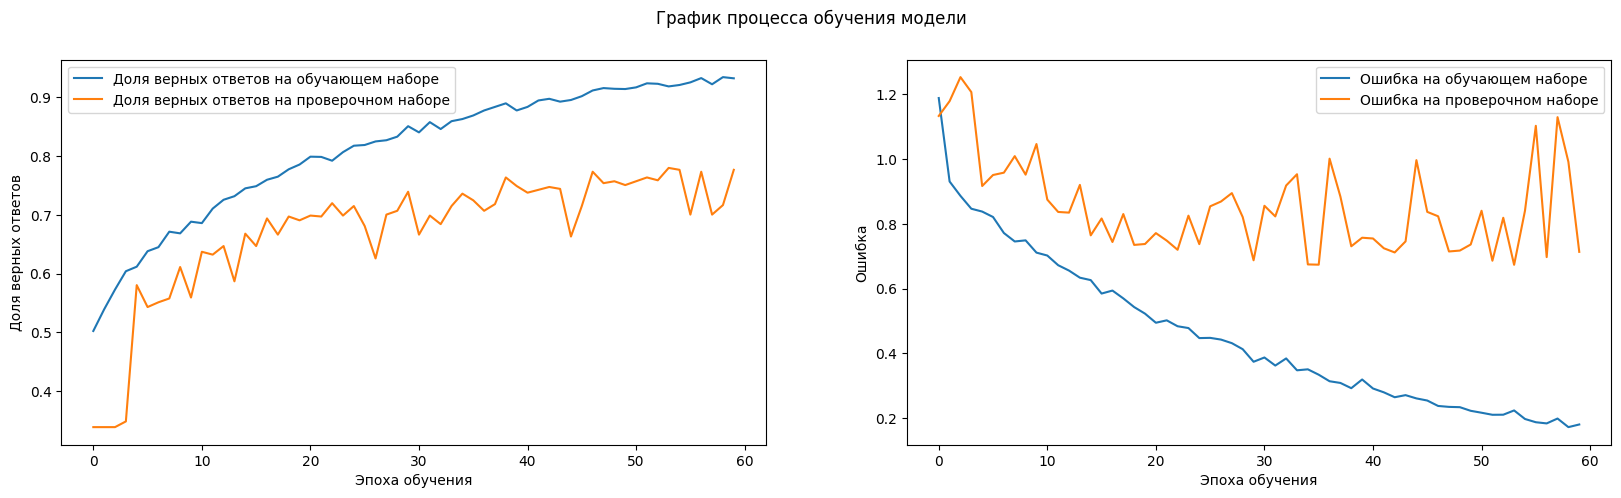

11/11 [==============================] - 4s 47ms/step


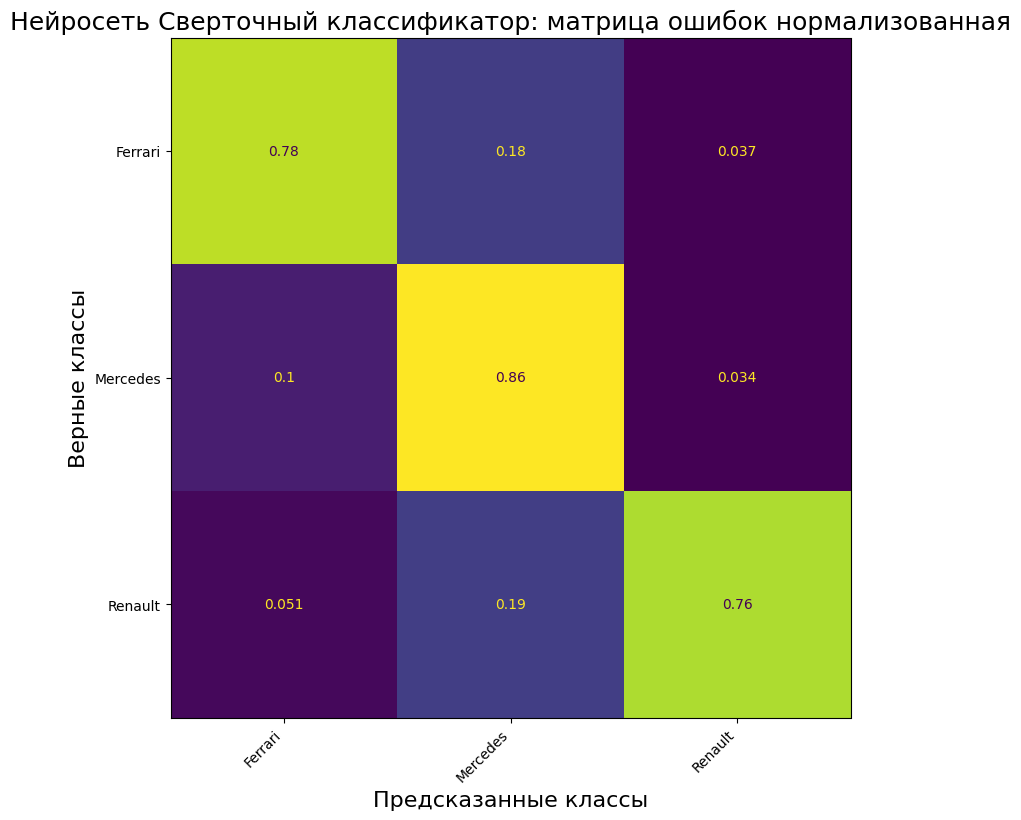

----------------------------------------------------------------------------------------------------
Нейросеть: Сверточный классификатор
Класс: Ferrari               78% сеть отнесла к классу Ferrari              - ВЕРНО :-)
Класс: Mercedes              86% сеть отнесла к классу Mercedes             - ВЕРНО :-)
Класс: Renault               76% сеть отнесла к классу Renault              - ВЕРНО :-)

Средняя точность распознавания:  80%


In [ ]:
# Создание последовательной модели
model_conv = Sequential()

# Первый сверточный слой
model_conv.add(
    Conv2D(
        256,
        (3, 3),
        padding="same",
        activation="relu",
        input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
    )
)
model_conv.add(BatchNormalization())

# Второй сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

# Третий сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model_conv.add(BatchNormalization())
model_conv.add(Dropout(0.2))

# Четвертый сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Пятый сверточный слой
model_conv.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model_conv.add(BatchNormalization())

# Шестой сверточный слой
model_conv.add(Conv2D(1024, (3, 3), padding="same", activation="relu"))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Слой преобразования многомерных данных в одномерные
model_conv.add(Flatten())

# Промежуточный полносвязный слой
model_conv.add(Dense(2048, activation="relu"))

# Промежуточный полносвязный слой
model_conv.add(Dense(4096, activation="relu"))

# Выходной полносвязный слой с количеством нейронов по количесту классов
model_conv.add(Dense(CLASS_COUNT, activation="softmax"))


# Обучение модели и вывод оценки ее работы на тестовых данных
compile_train_eval_model(
    model_conv,
    train_generator,
    validation_generator,
    test_generator,
    class_labels=CLASS_LIST,
    title="Сверточный классификатор",
)

In [ ]:
# Сохранение обученной модели полностью (веса и архитектура) после всех эпох

model_conv.save('model_cars_all.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Создание архива

In [ ]:
def predict(img_path="./test_image_1.jpg", model_path="./model_cars_all.h5"):
    classes = {
        0: 'Ferrari',
        1: 'Mercedes',
        2: 'Renault'
    }

    model = load_model(model_path)

    IMG_WIDTH = 64  # Ширина изображения для нейросети
    IMG_HEIGHT = 128  # Высота изображения для нейросети

    # Используем блок with для открытия и автоматического закрытия файла
    with Image.open(img_path) as img:
        test_image = img.resize((IMG_HEIGHT, IMG_WIDTH))
        image = np.array(test_image, dtype="float64") / 255  # Normalize the image
        image = np.expand_dims(image, axis=0)  # Add an extra dimension for the batch

    cls_image = np.argmax(model.predict(image))

    print(classes[cls_image])
    # Отрисовка итогового изображения
    plt.imshow(test_image, cmap="Greys_r")

    # Без сетки
    plt.grid(False)

    # Без осей
    plt.axis("off")

    # Вывод результата
    plt.show()


In [ ]:
from google.colab import files

# Загрузка одного файла
uploaded = files.upload()

# Загрузка нескольких файлов
# uploaded = files.upload()

# Пример обработки загруженных файлов
for filename, content in uploaded.items():
    with open(filename, "wb") as f:
        f.write(content)

print("Файлы успешно загружены!")

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Файлы успешно загружены!


1/1 [==============================] - 0s 119ms/step
Renault


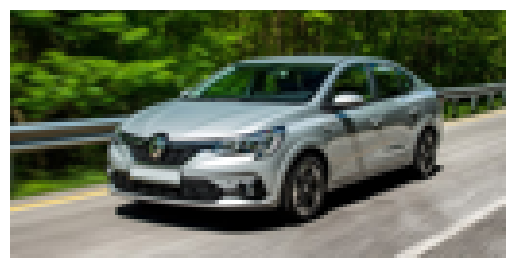

In [ ]:
predict("2.jpg", "model_cars_all.h5")

In [ ]:
# Сохранение кода скрипта в переменной text_code

text_code = """
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy as np


def predict(img_path="./test_image_1.jpg", model_path="./model_cars_all.h5"):
    classes = {
        0: 'Ferrari',
        1: 'Mercedes',
        2: 'Renault'
    }

    model = load_model(model_path)

    IMG_WIDTH = 64  # Ширина изображения для нейросети
    IMG_HEIGHT = 128  # Высота изображения для нейросети

    # Используем блок with для открытия и автоматического закрытия файла
    with Image.open(img_path) as img:
        test_image = img.resize((IMG_HEIGHT, IMG_WIDTH))
        image = np.array(test_image, dtype="float64") / 255  # Normalize the image
        image = np.expand_dims(image, axis=0)  # Add an extra dimension for the batch

    cls_image = np.argmax(model.predict(image))

    print(classes[cls_image])
"""

# Запись содержимого переменной в файл скрипта

with open("script.py", "w") as f:  # Создание / открытие файла
    f.write(text_code)  # Запись в файл значения переменной text_code

In [ ]:
# Библиотека для работы с файлами
from shutil import copyfile
import os

output_folder = "class_images"
os.makedirs(output_folder, exist_ok=True)

for i in range(0, 3):
    img_filename = os.path.join(output_folder, f"class_{i}.jpeg")
    plt.savefig(img_filename)

<Figure size 640x480 with 0 Axes>

In [ ]:
label_txt = """

0: Ferrari
1: Mercedes
2: Renault

"""

with open("label.txt", "w") as f:  # Создание / открытие файла
    f.write(label_txt.strip())  # Запись в файл значения переменной

In [ ]:
import os
from zipfile import ZipFile as Zip  # Модуль для работы с zip-архивами

# Список всех файлов
integrate_files = [
    "model_cars_all.h5",
    "script.py",
    "label.txt",
    *[f"{i}.jpg" for i in range(0, 3)],
]

zipArchive = Zip(
    "/content/archive.zip", "w"
)  # Открытие файла, если такого не существует - будет создан новый

for file in integrate_files:  # Для всех всем нужных файлов:
    if os.path.exists(file):  # Если файл существует,
        zipArchive.write(file)  # то добавление его в архив
    else:
        print(
            f"Файл {file} отсутствует!"
        )  # иначе вывод на экран названия отсутствующего файла

zipArchive.close()  # В финале архив следует закрыть, как и обычный файл

In [ ]:
from google.colab import files  # Функция для скачивания данных на локальный компьютер

files.download(filename="archive.zip")  # Скачивание готового архива

print("Архив загружен")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Архив загружен
